In [1]:
import numpy as np
import matplotlib.pyplot as plt
from genetic import Genetic_algorithm
from ants_colony import Ants_colony

In [2]:
def plot_tsp(coordinate_table, route):
    plt.figure(figsize=(12,6))
    plt.plot(coordinate_table[0], coordinate_table[1], 'o')
    for i in range(len(coordinate_table[0])):
        plt.text(coordinate_table[0][i], coordinate_table[1][i], str(i))
    for i in range(len(route)-1):
        plt.plot([coordinate_table[0][route[i]], coordinate_table[0][route[i+1]]], [coordinate_table[1][route[i]], coordinate_table[1][route[i+1]]], 'r-')
    plt.plot([coordinate_table[0][route[-1]], coordinate_table[0][route[0]]], [coordinate_table[1][route[-1]], coordinate_table[1][route[0]]], 'r-')
    plt.show()

def dist(P, i, j):
    return np.sqrt((P[0][i]-P[0][j])**2+(P[1][i]-P[1][j])**2)

def greedy_route(coordinate_table):
    greedy_route = [0]
    nodes_to_visit = list(range(len(coordinate_table[0])))[1:]
    while nodes_to_visit:
        next_node = max(nodes_to_visit, key=lambda x: (1/dist(coordinate_table, greedy_route[-1],x)))
        greedy_route.append(next_node)
        nodes_to_visit.remove(next_node)
    return greedy_route

Length of the route:  919.8191059310528


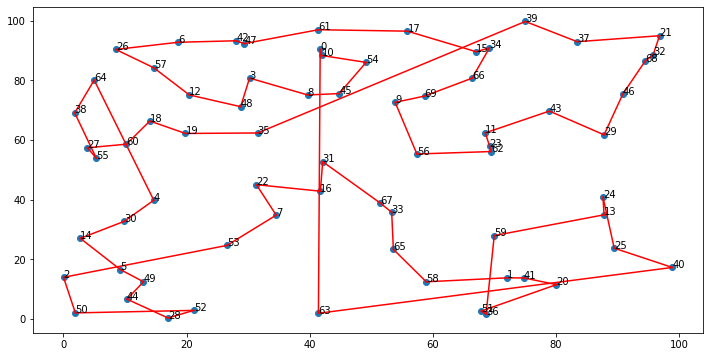

In [3]:
coordinate_table = np.load('Tsp_data/coordinate_table.npy')

first_result = greedy_route(coordinate_table)
print("Length of the route: ", Genetic_algorithm(coordinate_table, 100, 100).calculate_distance(first_result))
plot_tsp(coordinate_table, first_result)

### Genetic algorithm

In [4]:
generations = 100
num_population = 100
mutation_probability = 0.01

genetic = Genetic_algorithm(coordinate_table, generations=generations, 
                            num_population = num_population, 
                            mutation_probability=mutation_probability)
best_result = genetic.run()

New min value 919.8191059310528
Generation  0
Generation  10
Generation  20
New min value 907.3103095940801
New min value 902.1523781976357
Generation  30
Generation  40
New min value 900.3902253061892
Generation  50
Generation  60
Generation  70
Generation  80
Generation  90
best result:  [53, 7, 35, 0, 10, 54, 45, 8, 3, 48, 12, 57, 38, 64, 26, 6, 42, 47, 61, 17, 15, 34, 66, 69, 9, 56, 62, 23, 11, 43, 29, 46, 68, 32, 21, 37, 39, 19, 18, 60, 27, 55, 4, 30, 14, 5, 49, 44, 28, 52, 50, 2, 22, 16, 31, 67, 33, 65, 58, 1, 41, 20, 51, 36, 59, 13, 24, 25, 40, 63] 900.3902253061892


Length of the route:  900.3902253061892


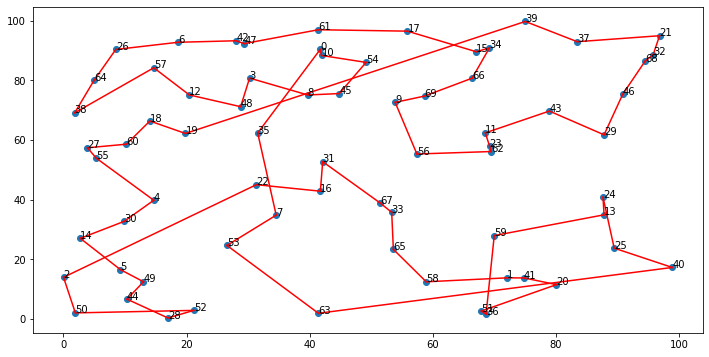

In [5]:
print("Length of the route: ", genetic.calculate_distance(best_result))
plot_tsp(coordinate_table, best_result)

### Ants colony

In [6]:
num_ants = 20
iterations = 100
colony = Ants_colony(coordinate_table, num_ants=num_ants, alpha=1, beta=1, evaporation_rate=0.5, q0=0.5)
best_result = colony.run(iterations=iterations)

New min value 1724.6622110823635
New min value 1639.826967550432
New min value 1526.0995632320273
Iteration:  0
New min value 1501.7947498057129
New min value 1487.2590165192605
New min value 1464.5521286287778
New min value 1415.553876429011
New min value 1260.1170782958757
New min value 1191.207749674107
Iteration:  10
New min value 1177.530222479949
New min value 1122.5036590541924
New min value 1085.7570119981115
New min value 979.2627318512536
New min value 977.2204166814445
New min value 954.0305112365423
New min value 936.51763402311
New min value 848.2092423924895
New min value 825.6395742597342
New min value 813.364886896659
New min value 786.425334362343
New min value 765.7170792466309
Iteration:  20
New min value 745.8580943727952
Iteration:  30
Iteration:  40
Iteration:  50
Iteration:  60
Iteration:  70
Iteration:  80
Iteration:  90
best result:  [5, 49, 44, 50, 28, 52, 63, 58, 51, 36, 1, 41, 20, 25, 40, 13, 24, 59, 65, 33, 67, 16, 22, 53, 7, 31, 35, 48, 12, 3, 8, 45, 9, 69

Length of the route:  745.8580943727952


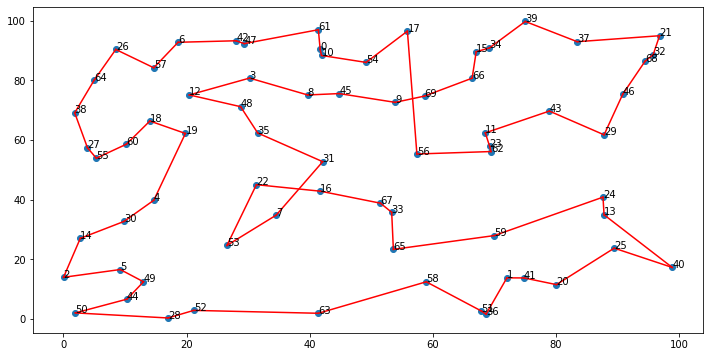

In [7]:
print("Length of the route: ", colony.calculate_distance(best_result))
plot_tsp(coordinate_table, best_result)